# Imports & Paths

In [1]:
import os
import sys
from sklearn.ensemble import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
if os.name == 'nt':
    PATH_base = 'E:\\GitHub\\data_science\\'
    PATH_bd = 'E:\\GitHub\\data_science\\data\\uncompressed\\blue_book_for_bulldozers\\'
    PATH_func = 'E:\\GitHub\\data_science\\src\\'
    sys.path.append(PATH_func)
elif os.name == 'posix':
    PATH = '/home/msnow/git/data_science/'
    DATA = '/data/msnow/data_science/'
    sys.path.append(PATH+'src/')

In [4]:
%matplotlib inline

from features.imports import *
from features.utilities import *
from features.fastai import *

/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# RF and time series data

## Create synthetic dataset

Let's create a fake "time-series" data set

In [7]:
x = np.linspace(0,1)
y = x+np.random.uniform(-0.2,0.2,x.shape)

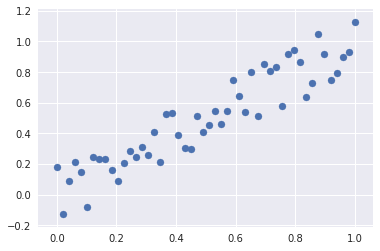

In [8]:
plt.scatter(x,y)

In [9]:
x_trn,x_val = x[:40],x[40:]
y_trn,y_val = y[:40],y[40:]

### Slicing arrays

In [18]:
print(x[None,:].shape)
print(x[None].shape)
print(x[None,].shape)
print(x[:,None].shape)

(1, 50)
(1, 50)
(1, 50)
(50, 1)


In [20]:
x2 = np.random.randint(1,10,(5,3,4))
x2.shape

(5, 3, 4)

In [21]:
print(x2[...,None].shape)
print(x2[None,...].shape)

(5, 3, 4, 1)
(1, 5, 3, 4)


## Build RF regressor

In [22]:
x1=x[...,None]
x_trn,x_val = x1[:40],x1[40:]
y_trn,y_val = y[:40],y[40:]

In [23]:
m = RandomForestRegressor().fit(x_trn,y_trn)

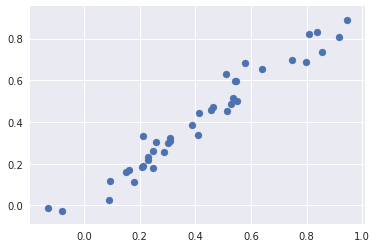

In [24]:
plt.scatter(y_trn,m.predict(x_trn))

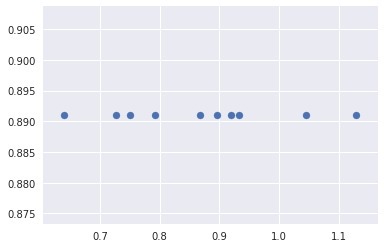

In [26]:
plt.scatter(y_val,m.predict(x_val))

So why is the RF regressor so bad at predicting the validation data.  The answer is that RF (and all decision trees) approximate an outcome by splitting the data into smaller and smaller subgroups, and then matches your test case to one of the subgroups.  In this case, there is only one value to split by.  As the drawn tree below demonstrates, the RF just keeps progressively splitting the data by `x`.  SO when trying to predict the validation set which is just the last 10 values from the arrays `x` an `y`, it uses the subgroup closest to those values, i.e., the subgroup containing the largest values of `x` 

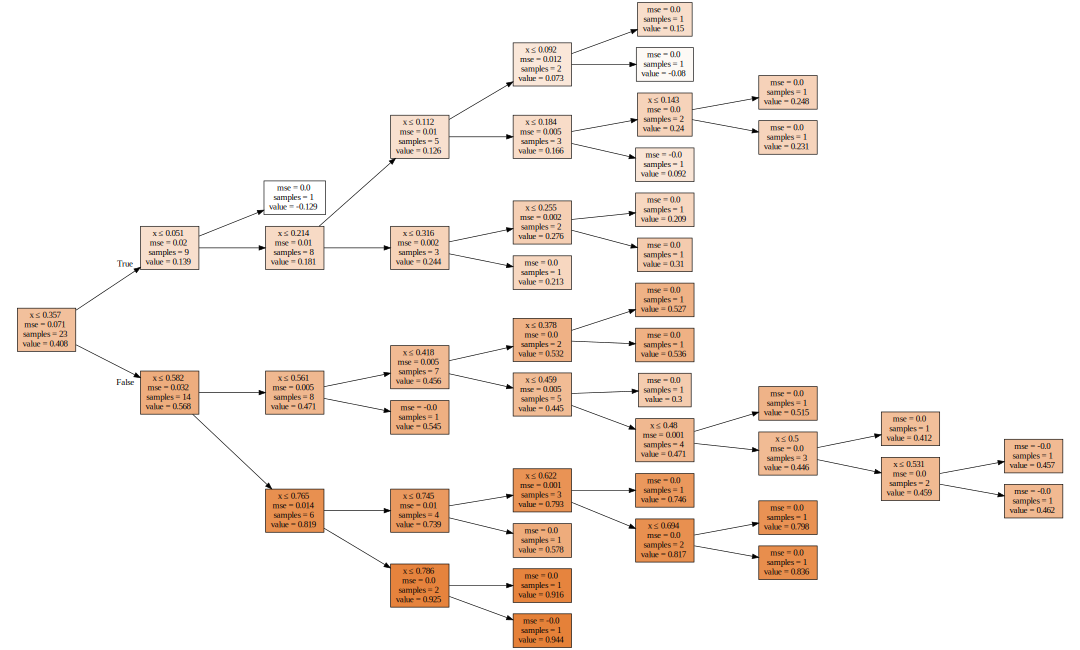

In [32]:
draw_tree(m.estimators_[0], pd.DataFrame(x_trn,columns=['x']), precision=3, size=15)

# Interactions